In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
# Step 1: Load the dataset
data = pd.read_csv('/content/phishingmmm.csv')  # Adjust the filename as needed
file_path = r"C:\Users\Downloads\phishingmm.csv"  # Update the file path if necessary
data = pd.read_csv('/content/phishingmmm.csv')

In [3]:
# Step 2: Data Overview
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

# Step 3: Handle Missing Values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

First 5 rows of the dataset:
   NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
0        3               1          5         72        0                  0   
1        3               1          3        144        0                  0   
2        3               1          2         58        0                  0   
3        3               1          6         79        1                  0   
4        3               0          4         46        0                  0   

   AtSymbol  TildeSymbol  NumUnderscore  NumPercent  ...  IframeOrFrame  \
0         0            0              0           0  ...              0   
1         0            0              2           0  ...              0   
2         0            0              0           0  ...              0   
3         0            0              0           0  ...              0   
4         0            0              0           0  ...              1   

   MissingTitle  ImagesOnlyInForm  Subd

In [4]:
# Step 4: Encode the Target Column
# Assuming 'CLASS_LABEL' is the target column for classification (binary: 0 and 1)
label_encoder = LabelEncoder()
data['CLASS_LABEL'] = label_encoder.fit_transform(data['CLASS_LABEL'])


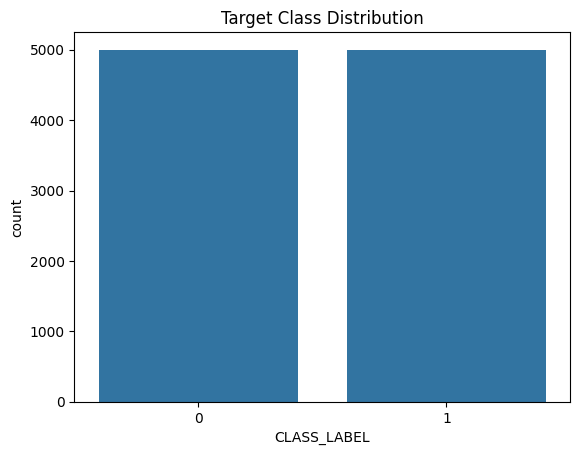

In [5]:
# Step 5: Data Visualization
# Visualize class distribution
sns.countplot(x='CLASS_LABEL', data=data)
plt.title("Target Class Distribution")
plt.show()

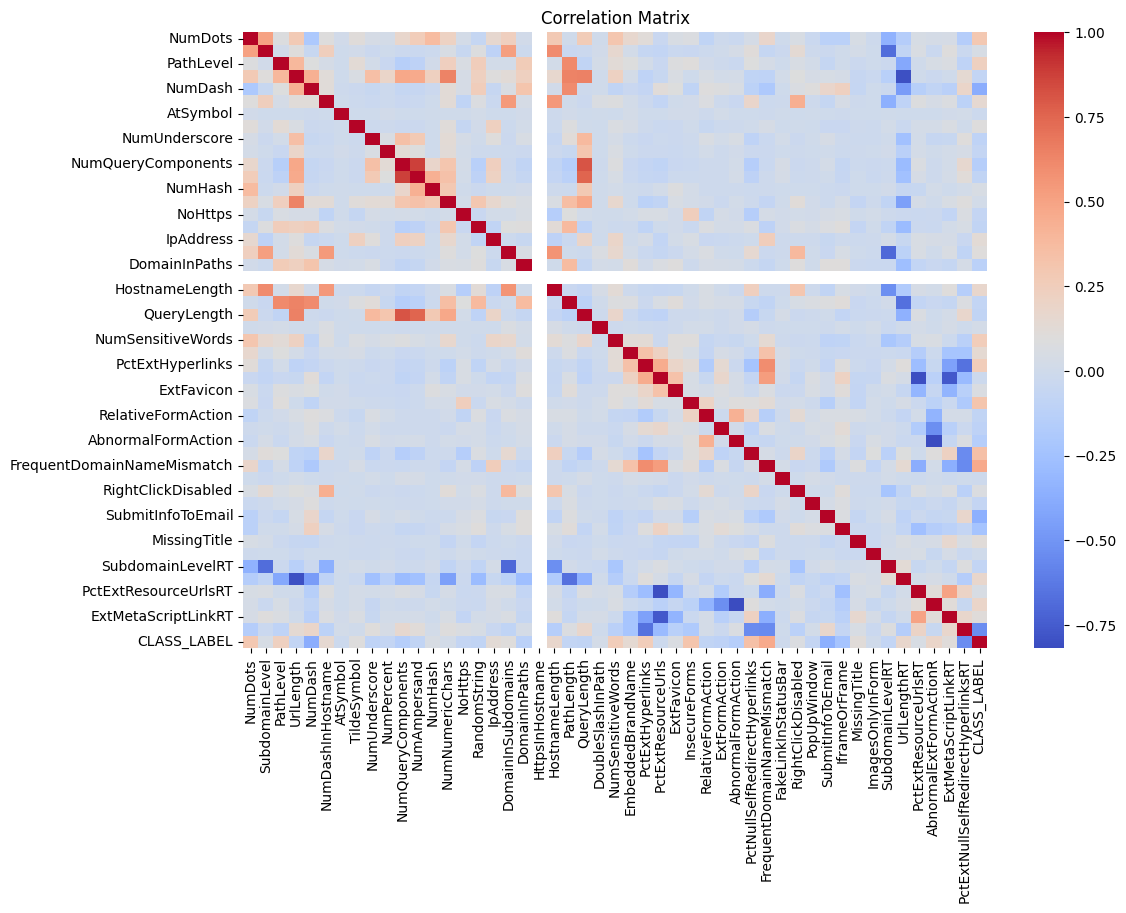

In [6]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Step 6: Split Features and Target
X = data.drop(columns=['CLASS_LABEL'])  # All features
y = data['CLASS_LABEL']  # Target variable

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 8: Build the Deep Learning Model
# Initialize the model
model = Sequential()

In [11]:
# Input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,249 (20.50 KB)

 Trainable params: 5,249 (20.50 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Step 9: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7299 - loss: 0.5357 - val_accuracy: 0.9162 - val_loss: 0.2103
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.2346 - val_accuracy: 0.9375 - val_loss: 0.1798
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9318 - loss: 0.1856 - val_accuracy: 0.9350 - val_loss: 0.1687
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9362 - loss: 0.1800 - val_accuracy: 0.9388 - val_loss: 0.1608
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.1736 - val_accuracy: 0.9413 - val_loss: 0.1554
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9461 - loss: 0.1498 - val_accuracy: 0.9362 - val_loss: 0.1520
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1371 - val_accuracy: 0.9463 - val_loss: 0.1461
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1264 - val_accuracy: 0.

In [16]:
# Step 10: Evaluate the Model
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9637 - loss: 0.0943

Test Accuracy: 96.40%


In [17]:
# Step 11: Generate Confusion Matrix and Classification Report
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[952  36]
 [ 36 976]]


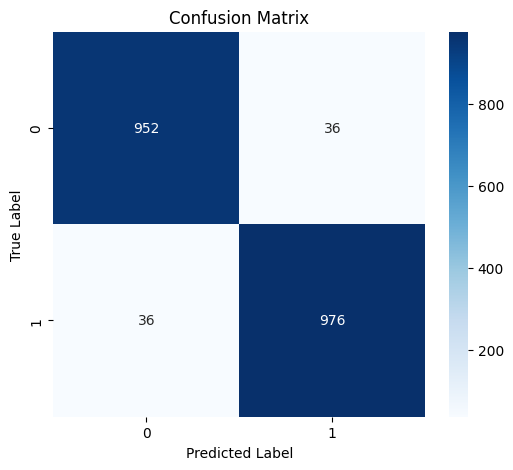

In [19]:
# Visualization of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       988
           1       0.96      0.96      0.96      1012

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

